In [ ]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
vix = pd.read_csv('VIXCLS.csv', index_col='DATE', parse_dates=True)
vix.head()


,VIXCLS
DATE,
1996-01-01,12.53
1996-02-01,17.04
1996-03-01,18.88
1996-04-01,15.83
1996-05-01,16.07


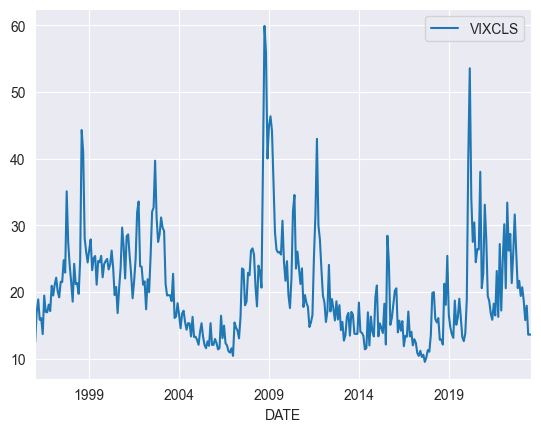

In [ ]:
vix.plot()
plt.show()

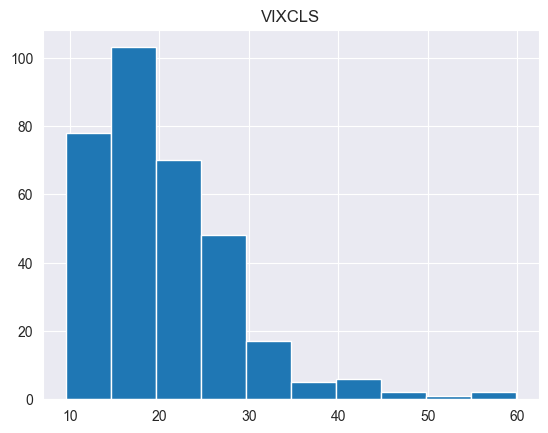

In [ ]:
vix.hist()
plt.show()

In [ ]:
exog = pd.read_csv('combined_data.csv', index_col='DATE', parse_dates=True)
exog.head()

,TB3MS,UMCSENT,DXYNYB,SPX return,DJIA return,PPIACO,UNRATE,M1SL,BAMLC0A4CBBBEY,DGS5,BAMLC0A4CBBB,DGS10,WM2NS,CSUSHPINSA,CPIAUCSL,T10Y2Y,MPRIME,ICSA,EFFR
DATE,,,,,,,,,,,,,,,,,,,
1996-01-01,5.00,89.3,87.379997,0.032617,0.054363,126.3,5.6,1123.5,NaN,5.362381,NaN,5.652381,3654.660,81.426,154.7,0.540000,8.50,374000.0,NaN
1996-02-01,4.83,88.5,86.290001,0.006934,0.016741,126.2,5.5,1118.5,NaN,5.379500,NaN,5.805500,3644.800,81.398,155.0,0.780000,8.25,377250.0,NaN
1996-03-01,4.96,93.7,86.519997,0.007917,0.018507,126.4,5.5,1122.6,NaN,5.966190,NaN,6.268571,3689.075,81.664,155.5,0.607619,8.25,386400.0,NaN
1996-04-01,4.95,92.7,88.019997,0.013431,-0.003232,127.4,5.6,1124.8,NaN,6.300909,NaN,6.511364,3717.460,82.123,156.1,0.554091,8.25,359250.0,NaN
1996-05-01,5.02,89.4,87.779999,0.022853,0.013306,128.1,5.6,1116.5,NaN,6.483182,NaN,6.736818,3689.225,82.601,156.4,0.641818,8.25,344500.0,NaN


In [ ]:
combined_data = exog.copy()
combined_data['VIX'] = vix
combined_data.head()

,TB3MS,UMCSENT,DXYNYB,SPX return,DJIA return,PPIACO,UNRATE,M1SL,BAMLC0A4CBBBEY,DGS5,BAMLC0A4CBBB,DGS10,WM2NS,CSUSHPINSA,CPIAUCSL,T10Y2Y,MPRIME,ICSA,EFFR,VIX
DATE,,,,,,,,,,,,,,,,,,,,
1996-01-01,5.00,89.3,87.379997,0.032617,0.054363,126.3,5.6,1123.5,NaN,5.362381,NaN,5.652381,3654.660,81.426,154.7,0.540000,8.50,374000.0,NaN,12.53
1996-02-01,4.83,88.5,86.290001,0.006934,0.016741,126.2,5.5,1118.5,NaN,5.379500,NaN,5.805500,3644.800,81.398,155.0,0.780000,8.25,377250.0,NaN,17.04
1996-03-01,4.96,93.7,86.519997,0.007917,0.018507,126.4,5.5,1122.6,NaN,5.966190,NaN,6.268571,3689.075,81.664,155.5,0.607619,8.25,386400.0,NaN,18.88
1996-04-01,4.95,92.7,88.019997,0.013431,-0.003232,127.4,5.6,1124.8,NaN,6.300909,NaN,6.511364,3717.460,82.123,156.1,0.554091,8.25,359250.0,NaN,15.83
1996-05-01,5.02,89.4,87.779999,0.022853,0.013306,128.1,5.6,1116.5,NaN,6.483182,NaN,6.736818,3689.225,82.601,156.4,0.641818,8.25,344500.0,NaN,16.07


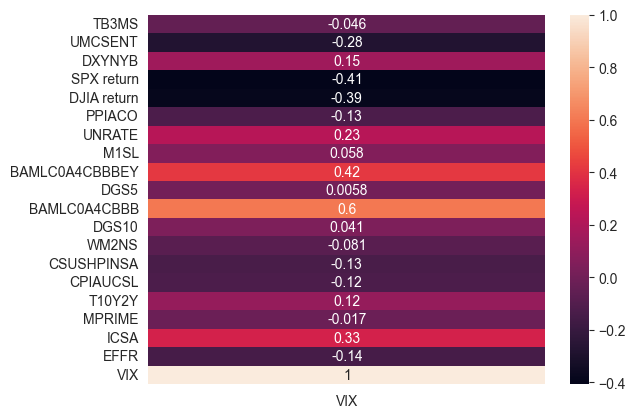

In [ ]:
corr_matrix = combined_data.corr()
sns.heatmap(corr_matrix[['VIX']], annot=True)
plt.show()

In [ ]:
print(exog.shape)
print(vix.shape)

(332, 19)
(332, 1)


In [ ]:
exog.isnull().sum()

TB3MS              0
UMCSENT            0
DXYNYB             0
SPX return         0
DJIA return        0
PPIACO             0
UNRATE             0
M1SL               0
BAMLC0A4CBBBEY    12
DGS5               0
BAMLC0A4CBBB      12
DGS10              0
WM2NS              0
CSUSHPINSA         1
CPIAUCSL           0
T10Y2Y             0
MPRIME             0
ICSA               0
EFFR              54
dtype: int64

In [ ]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
def fit_predict(X, y):
    x_train, x_test = train_test_split(X, train_size=0.8)
    y_train, y_test = train_test_split(y, train_size=0.8)

    #model
    model = pm.arima.auto_arima(y=y_train, X=x_train, start_p=1, start_q=1,max_p=9,max_d=9,max_q=9, m=12, start_P=0, seasonal=True, suppress_warnings=True, stepwise=True, trace=True, out_of_sample_size=20, error_action='ignore')
    print(model.summary())
    prediction, confit = model.predict(n_periods=y_test.shape[0], return_conf_int=True, X=x_test)
    mse = mean_squared_error(y_test, prediction)
    print("MSE: ", mse)

    cf = pd.DataFrame(confit)

    prediction_series = pd.Series(prediction,index=y_test.index)
    fig, ax = plt.subplots(1, 1, figsize=(15, 5))
    ax.plot(y)
    ax.plot(prediction_series)
    ax.fill_between(prediction_series.index,cf[0],cf[1],color='grey',alpha=.3)
    plt.show()

    model.plot_diagnostics(figsize=(14,10))
    plt.show()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=1130.489, Time=2.68 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1240.752, Time=0.30 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1123.575, Time=2.43 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1148.290, Time=2.32 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2048.875, Time=0.26 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1122.107, Time=0.31 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=1124.004, Time=2.31 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=1126.018, Time=2.34 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=1137.096, Time=0.46 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=1128.588, Time=0.44 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=1146.389, Time=0.41 sec


/Users/kundan/Documents/ncsu/fall23/vix_project/venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/kundan/Documents/ncsu/fall23/vix_project/venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=1286.033, Time=0.40 sec
 ARIMA(1,0,0)(0,0,0)[12]             : AIC=1119.991, Time=0.28 sec
 ARIMA(1,0,0)(1,0,0)[12]             : AIC=1121.459, Time=2.15 sec
 ARIMA(1,0,0)(0,0,1)[12]             : AIC=1121.889, Time=2.21 sec
 ARIMA(1,0,0)(1,0,1)[12]             : AIC=1123.889, Time=2.80 sec
 ARIMA(2,0,0)(0,0,0)[12]             : AIC=1134.780, Time=0.65 sec
 ARIMA(1,0,1)(0,0,0)[12]             : AIC=1126.561, Time=0.39 sec
 ARIMA(0,0,1)(0,0,0)[12]             : AIC=1144.308, Time=0.38 sec
 ARIMA(2,0,1)(0,0,0)[12]             : AIC=1283.791, Time=0.57 sec

Best model:  ARIMA(1,0,0)(0,0,0)[12]          
Total fit time: 24.232 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  220
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -538.996
Date:                Tue, 17 Oct 2023   AIC                           1119.991
Ti

/Users/kundan/Documents/ncsu/fall23/vix_project/venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/kundan/Documents/ncsu/fall23/vix_project/venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


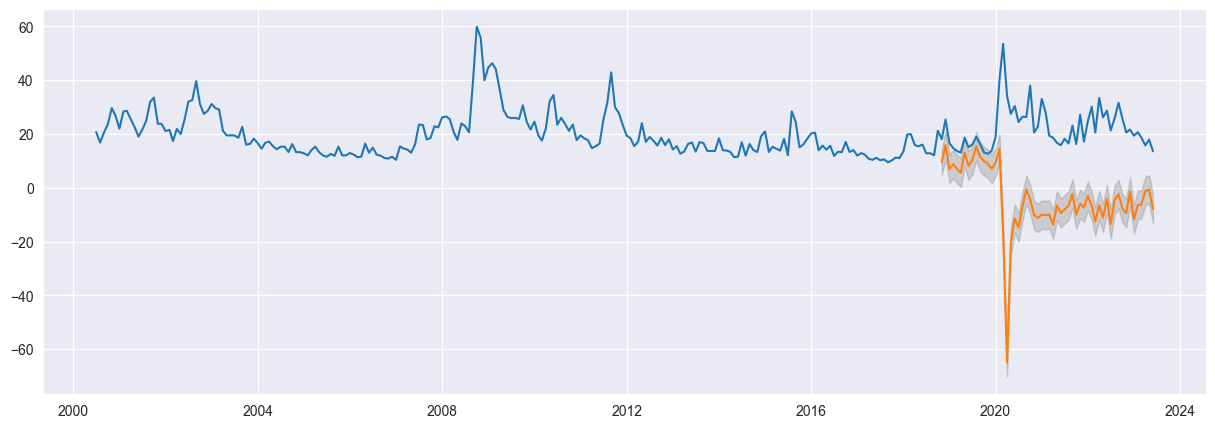

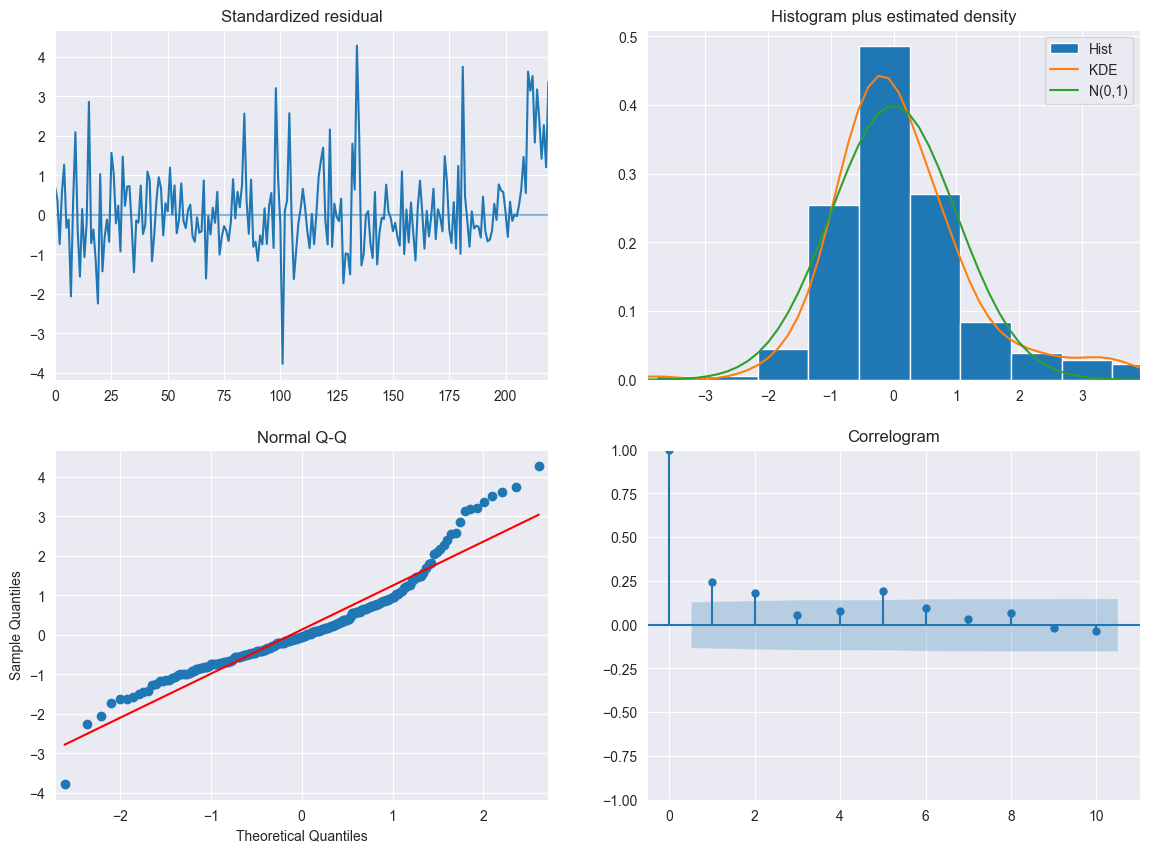

In [ ]:
fit_predict(exog[54:330], vix[54:330])

In [ ]:
selected_features = exog[['BAMLC0A4CBBB', 'BAMLC0A4CBBBEY', 'SPX return', 'DJIA return', 'UMCSENT', 'UNRATE']]
selected_features.tail()

,BAMLC0A4CBBB,BAMLC0A4CBBBEY,SPX return,DJIA return,UMCSENT,UNRATE
DATE,,,,,,
2023-04-01,1.733500,5.459500,0.014642,0.024764,63.5,3.4
2023-05-01,1.796087,5.648261,0.002482,-0.034896,59.2,3.7
2023-06-01,1.691364,5.796364,0.064727,0.045561,64.4,3.6
2023-07-01,1.554762,5.814762,0.031139,0.033479,71.6,3.5
2023-08-01,1.518696,5.986957,-0.017716,-0.023555,69.5,3.8


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=1300.722, Time=0.89 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1505.312, Time=0.18 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1303.518, Time=0.59 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1358.557, Time=0.64 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1511.130, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=1298.803, Time=0.21 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=1301.280, Time=0.71 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=1303.265, Time=0.72 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=1361.950, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1302.283, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=1301.106, Time=0.18 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=1301.197, Time=0.19 sec
 ARIMA(0,0,2)(0,0,0)[12] intercept   : AIC=1317.578, Time=0.17 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=1299.916, Time=0.15 sec
 ARIMA(2,0,2)(0,0,0

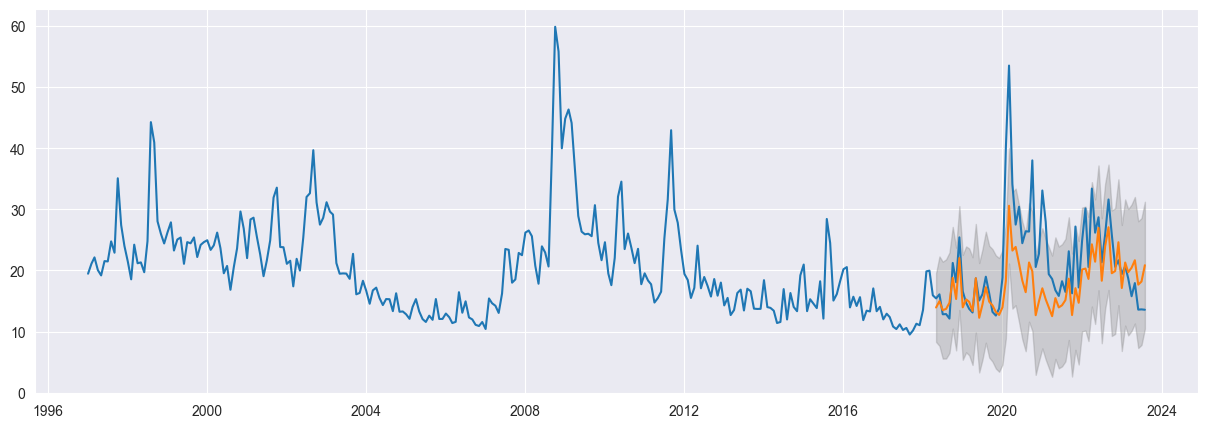

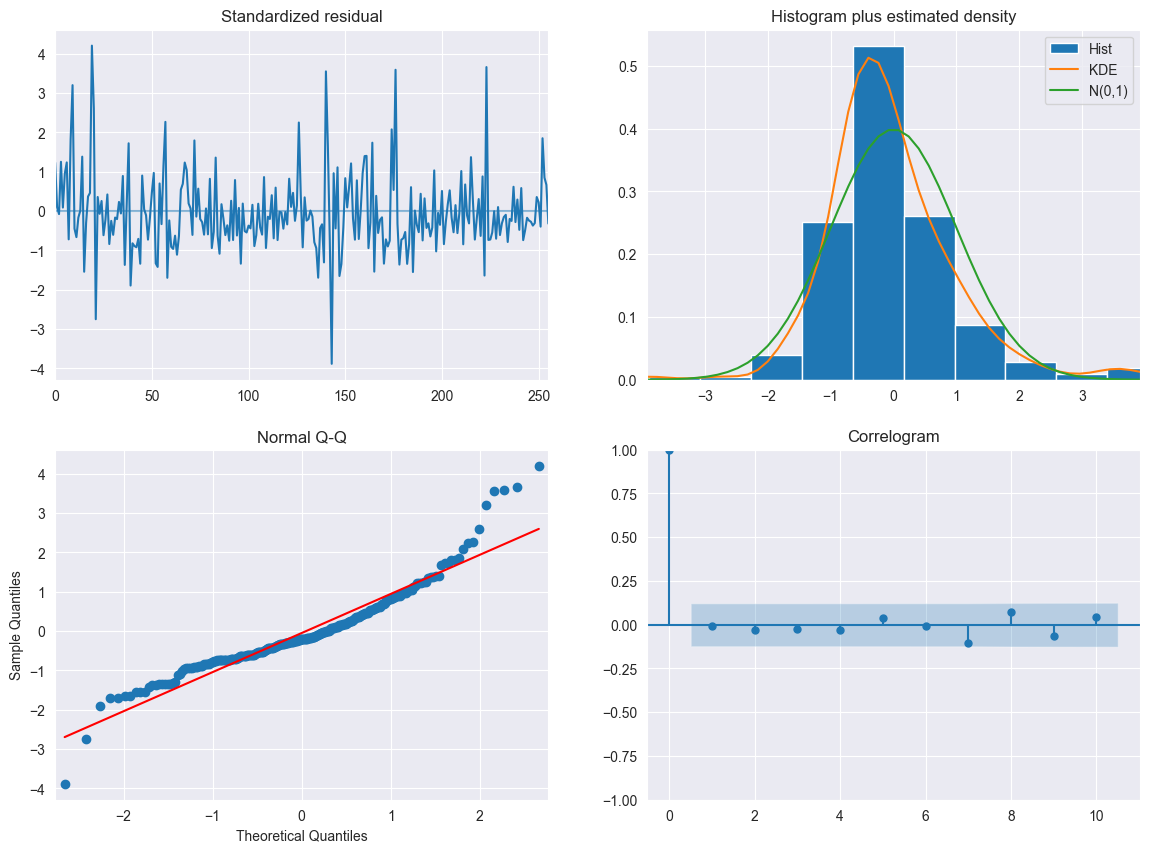

In [ ]:
fit_predict(selected_features[12:], vix[12:])